# Task 2

In [207]:
import math
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
import random
from sklearn import preprocessing


# Obtaining and normalizing MNIST dataset helped by: https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627
# Mean and Standart Deviation 0.5 each for data normalization [-1, 1] 
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),

                               ])
# No normalization
transform2 = transforms.ToTensor()

batch_size = 10000

trainset = datasets.MNIST('', download=True, train=True, transform=transform)
valset = datasets.MNIST('', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size, shuffle=True)

dataiter = iter(trainloader)
images, labels_ = dataiter.next()

testiter = iter(valloader)
images1, labels1 = testiter.next()

# Turning the dataset into batch size of flattened 28*28 pixels
# And one hot encoding for the labels

x_train = images.numpy()
x_train = np.reshape(x_train, (batch_size,28*28))
labels = labels_.numpy()
labels = labels.reshape(-1, 1)
ohe = preprocessing.OneHotEncoder()
ohe.fit(labels)
y_train = ohe.transform(labels).toarray()



x_test = images1.numpy()
x_test = np.reshape(x_test, (batch_size,28*28))
labels1 = labels1.numpy()
labels1 = labels1.reshape(-1, 1)
ohe.fit(labels1)
y_test = ohe.transform(labels1).toarray()



#plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')






class NeuralNetwork:
    def __init__(self, lr, units1, units2, layer1, layer2):
        self.train_loss = [] # list to store losses
        
        if (layer1 == "sigmoid"):
            self.layer1_feedforward_activation = self.sigmoid
            self.layer1_backward_activation = self.sigmoid_derivative
        else:
            self.layer1_feedforward_activation = self.relu
            self.layer1_backward_activation = self.relu_derivative
        if (layer2 == "sigmoid"):
            self.layer2_feedforward_activation = self.sigmoid
            self.layer2_backward_activation = self.sigmoid_derivative
        else:
            self.layer2_feedforward_activation = self.relu
            self.layer2_backward_activation = self.relu_derivative
        
        
        
        self.lr = lr
        self.units1 = units1
        self.units2 = units2
        
        
        self.wih = np.random.normal(0.0, pow(784, -0.5), (784 , self.units1))
        self.whh = np.random.normal(0.0, pow(self.units1, -0.5), (self.units1, self.units2))
        self.who = np.random.normal(0.0, pow(self.units2, -0.5), (self.units2, 10))
    
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
        
    
    def sigmoid_derivative(self, x):
        return x * (1-x)
    
    def relu(self, x):
        x = np.maximum(0,x)
        return x

    def relu_derivative(self, x):
        x[x<=0] = 0
        x[x>0] = 1
        return x
    
    

    #def softmax(self, x):
     #   e = np.exp(x - x.max())
      #  return e / e.sum()
    
    # Taken from https://www.adeveloperdiary.com/data-science/deep-learning/neural-network-with-softmax-in-python/
    def softmax(self, s):
        exps = np.exp(s - np.max(s, axis=1, keepdims=True))
        return exps/np.sum(exps, axis=1, keepdims=True)
    
    
    
        # Cross entropy cost funtion
        # Got from the internet, couldn't find the source after
    def error(self, pred, real):
        n_samples = real.shape[0]   # No. of rows in data
        logp = - np.log(pred[np.arange(n_samples), real.argmax(axis=1)])
        loss = np.sum(logp)/n_samples

        return loss
    
        # use to calculation errors (y - y predicted)
    def cross_entropy(self, pred, real):
        res = pred - real
        return res
    
    def train(self, inputs, targets):
               
        # Feedforward
        hidden_inputs_1 = np.dot(inputs,self.wih)  
        hidden_outputs_1 = self.layer1_feedforward_activation(hidden_inputs_1)

        hidden_inputs_2 = np.dot(hidden_outputs_1,self.whh)
        hidden_outputs_2 = self.layer2_feedforward_activation(hidden_inputs_2)


        final_inputs = np.dot(hidden_outputs_2,self.who)
        final_outputs = self.softmax(final_inputs)

        output_errors = self.error(final_outputs,targets)
        
        #print("Loss Train : ", output_errors)
        self.train_loss.append(output_errors)
        
        # Backpropagation

        who_delta = self.cross_entropy(final_outputs,targets) # W3
        final_inputs_delta =  np.dot(who_delta, self.who.T)

        whh_delta = final_inputs_delta  * self.layer2_backward_activation(hidden_outputs_2) # w2
        hidden_inputs_2_delta = np.dot(whh_delta, self.whh.T)

        whi_delta = hidden_inputs_2_delta * self.layer1_backward_activation(hidden_outputs_1) # w1
        
        
        # Weights updates 

        self.who -= self.lr * np.dot(hidden_outputs_2.T, who_delta)
        self.whh -= self.lr * np.dot(hidden_outputs_1.T, whh_delta)
        self.wih -= self.lr * np.dot(inputs.T, whi_delta)
        
        return output_errors
    
    def validate(self, inputs, targets):
        hidden_inputs_1 = np.dot(inputs,self.wih)  
        hidden_outputs_1 = self.layer1_feedforward_activation(hidden_inputs_1)

        hidden_inputs_2 = np.dot(hidden_outputs_1,self.whh)
        hidden_outputs_2 = self.layer2_feedforward_activation(hidden_inputs_2)


        final_inputs = np.dot(hidden_outputs_2,self.who)
        final_outputs = self.softmax(final_inputs)

        output_errors = self.error(final_outputs,targets)
        
        return output_errors
        
   
        
        
        
   
    
   

    

    
    


 
    
    









Training loss:  1.6134392361550798
Testing loss:  1.6120310605881398
No. of epochs  1
Training loss:  0.7756292044973956
Testing loss:  0.7750642310182322
No. of epochs  2
Training loss:  0.5432671734505764
Testing loss:  0.5437009290758759
No. of epochs  3
Training loss:  0.4505844836017938
Testing loss:  0.4517347563193307
No. of epochs  4
Training loss:  0.40106470825768625
Testing loss:  0.4038345582227897
No. of epochs  5


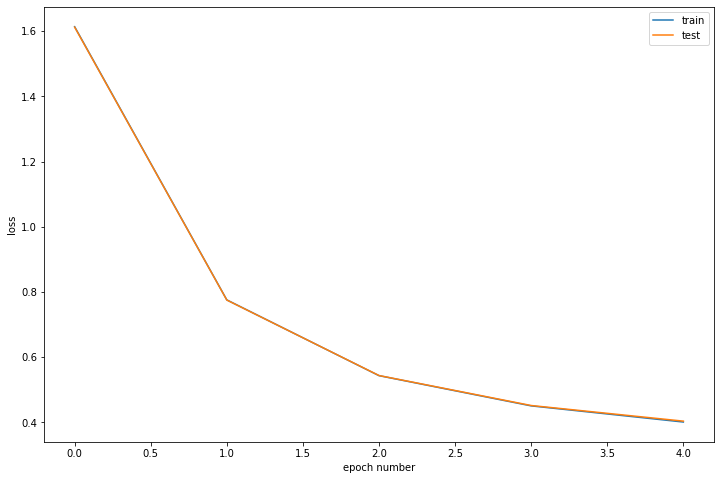

Training loss:  0.68513826369325
Testing loss:  0.6770523175500929
No. of epochs  1
Training loss:  0.34672358235132666
Testing loss:  0.3620484887315138
No. of epochs  2
Training loss:  0.2795521924332199
Testing loss:  0.31841801225109007
No. of epochs  3
Training loss:  0.23243032724841847
Testing loss:  0.28753711889237354
No. of epochs  4
Training loss:  0.19493759061596966
Testing loss:  0.26585532048145805
No. of epochs  5


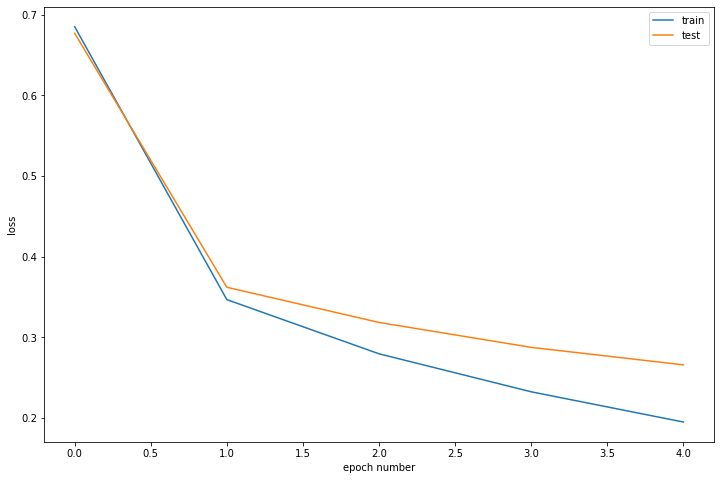

In [208]:
# Make the figures bigger
plt.rcParams['figure.figsize'] = [12, 8]



# A function to train and test the model from the class NeuralNetwork
def train_test(epochs, model):
    epoch_errors_train = []  # training set errors
    epoch_errors_test = []  # testing set errors
    for i in range(epochs):
        total_error_train = 0
        total_error_test = 0
        for x,y,z,e in zip(x_train,y_train, x_test, y_test):
            # Train and test the models
            total_error_train += model.train(x.reshape(1,-1),y.reshape(1,-1))
            total_error_test += model.validate(z.reshape(1, -1), e.reshape(1, -1))
        epoch_errors_train.append(total_error_train/batch_size) # Divide by batch size
        epoch_errors_test.append(total_error_test/batch_size)
        print("Training loss: ", total_error_train/batch_size)
        print("Testing loss: ", total_error_test/batch_size)
        print("No. of epochs ",i+1)
        
    # Plotting the results
    plt.plot(epoch_errors_train, label='train')
    plt.plot(epoch_errors_test, label='test')
    plt.xlabel('epoch number')
    plt.ylabel('loss')
    plt.legend()
    plt.show()
    
    
    
    
    
    

model = NeuralNetwork(0.001, 128, 64, "sigmoid", "relu")
model2 = NeuralNetwork(0.01, 128, 64, "relu", "sigmoid")
train_test(5, model)
train_test(5, model2)



2
